In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np
import inspect

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info

In [4]:
from pyha.applications.spectrogram_limesdr.spectrogram_limesdr import SpectrogramLimeSDR
print(inspect.getdoc(SpectrogramLimeSDR))
print('\n\nMain interface\n' + inspect.getdoc(SpectrogramLimeSDR.main))

8k FFT spectrogram for LimeSDR Mini.


Main interface
Args:
    input (DataValid): 12 bit IQ, -1.0 ... 1.0 range

Returns:
    DataValid: Upper 32 bits from the spectrogram core.


# Examples

## High power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 262144/262144 [04:25<00:00, 989.01it/s]


INFO:sim:Flushing the pipeline to collect 2048 valid samples (currently have 1536)
INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


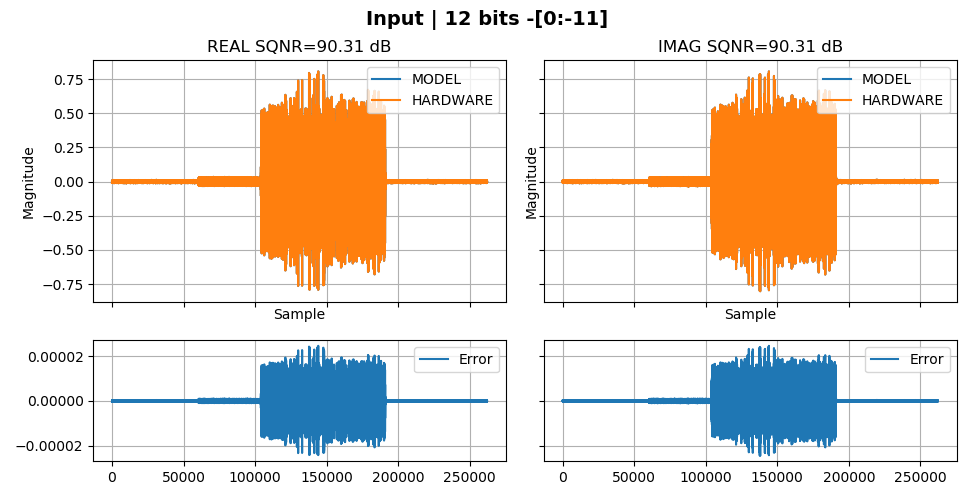

<IPython.core.display.Javascript object>


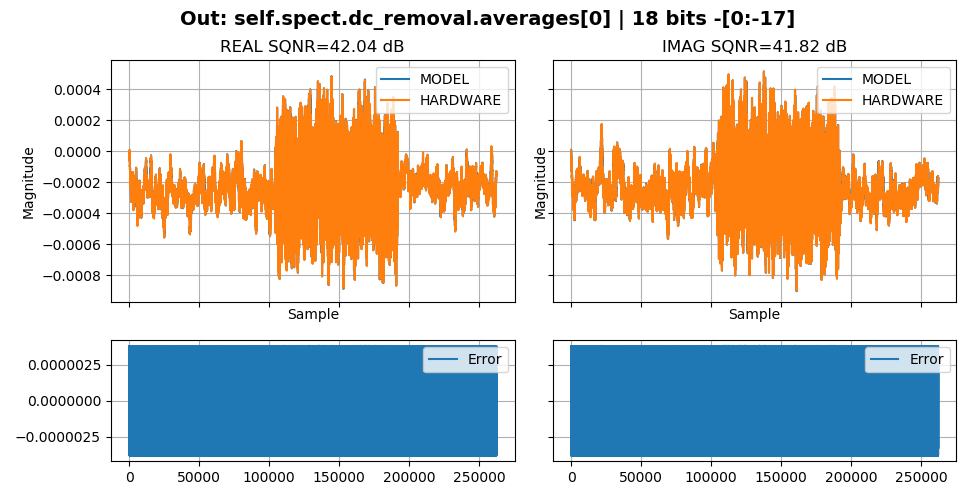

<IPython.core.display.Javascript object>


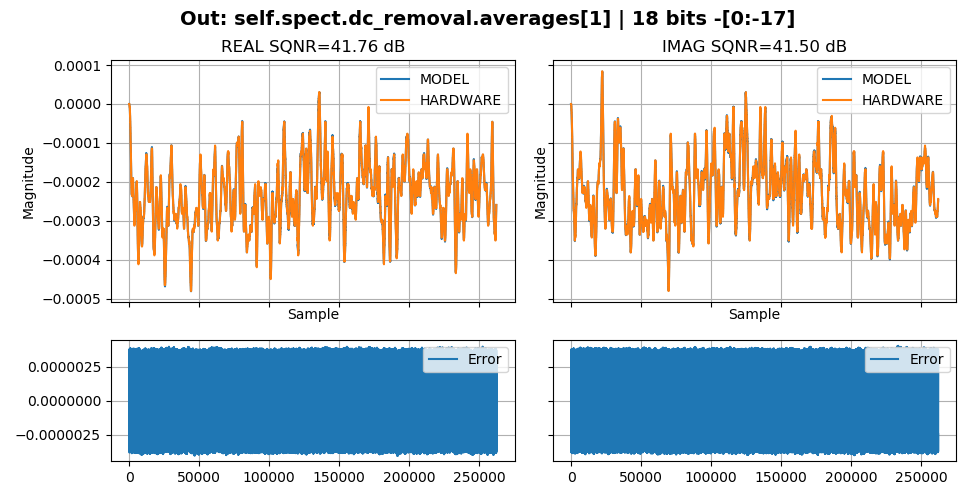

<IPython.core.display.Javascript object>


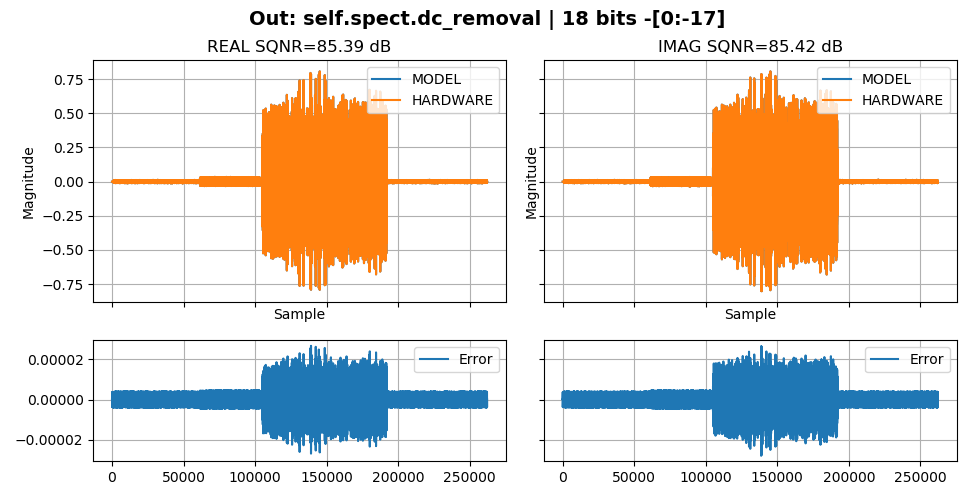

<IPython.core.display.Javascript object>


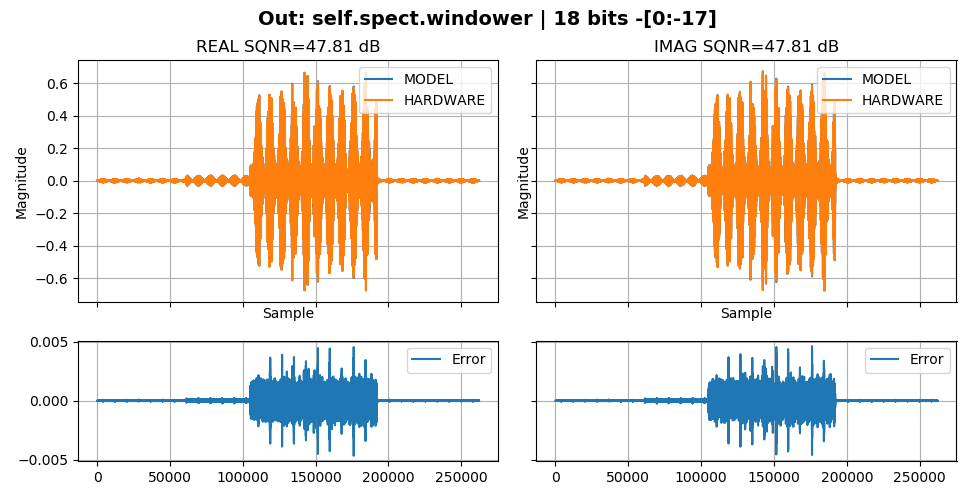

<IPython.core.display.Javascript object>


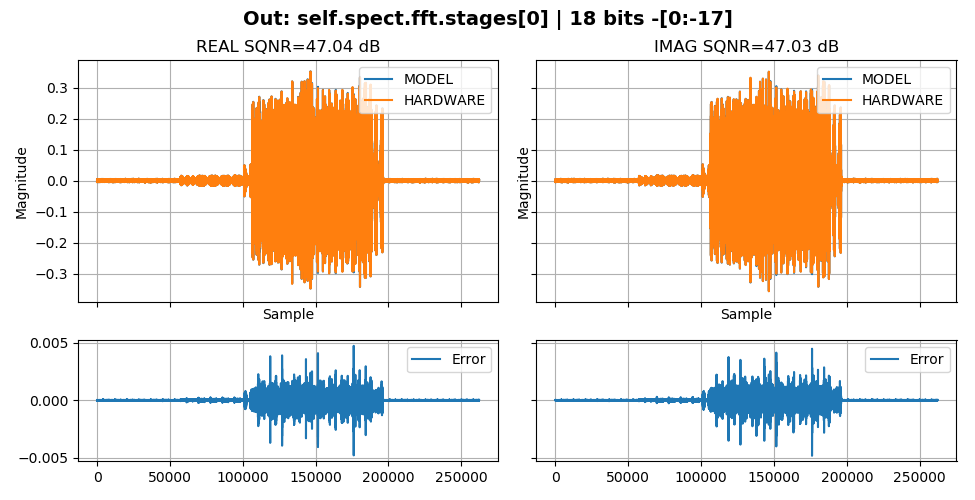

<IPython.core.display.Javascript object>


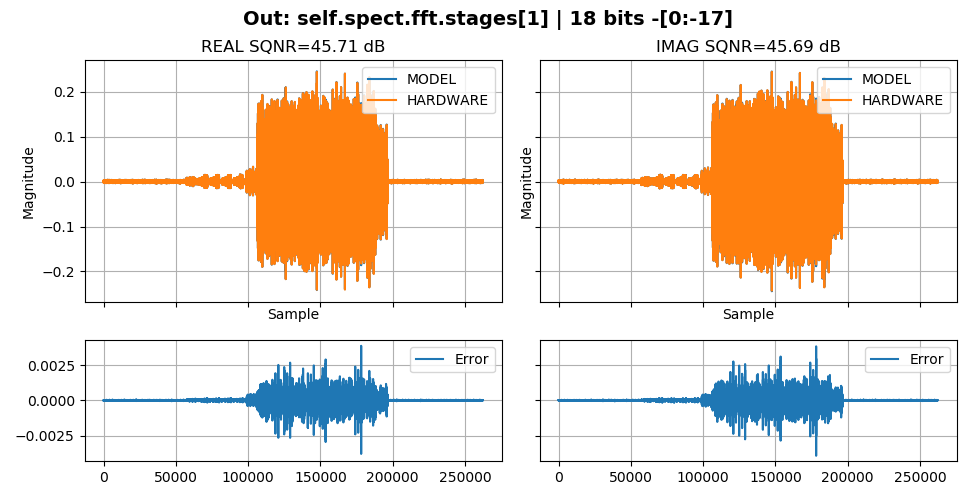

<IPython.core.display.Javascript object>


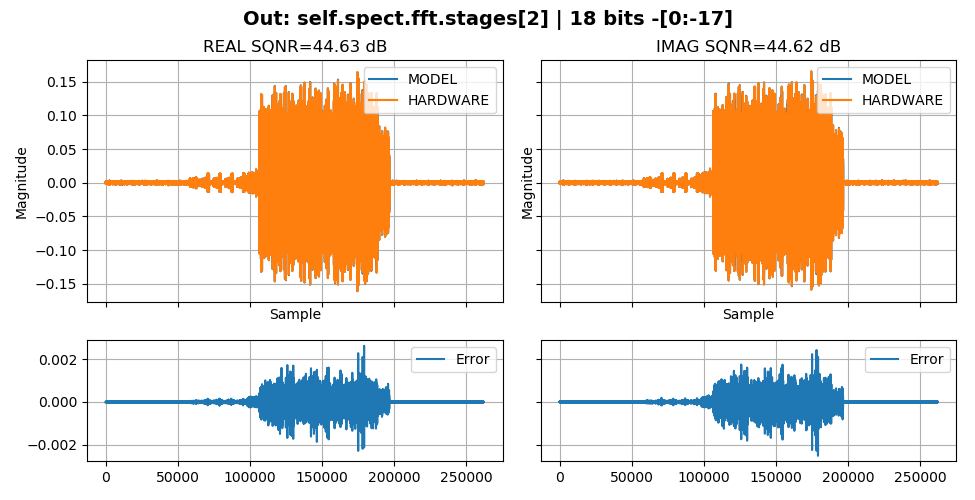

<IPython.core.display.Javascript object>


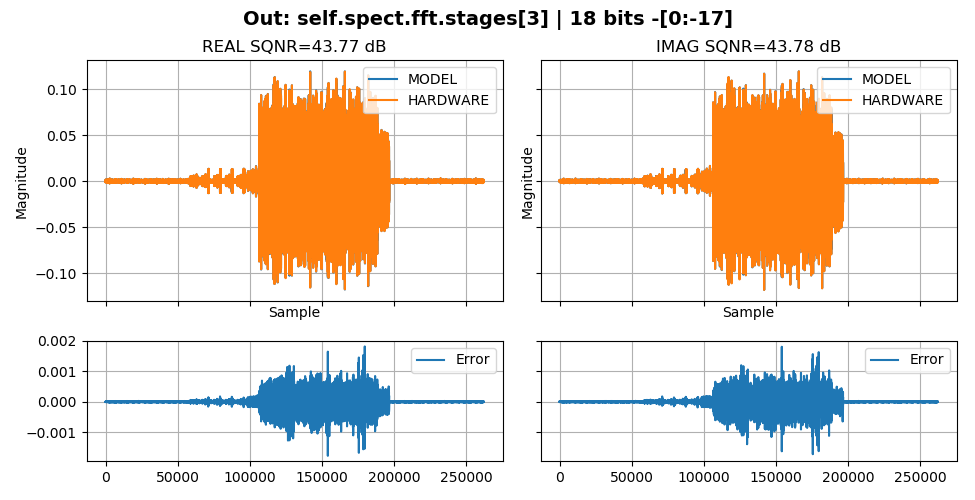

<IPython.core.display.Javascript object>


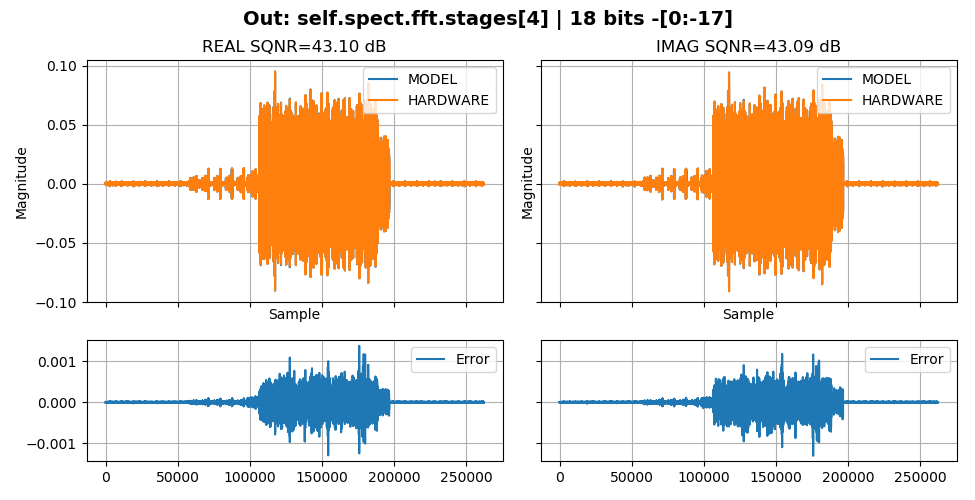

<IPython.core.display.Javascript object>


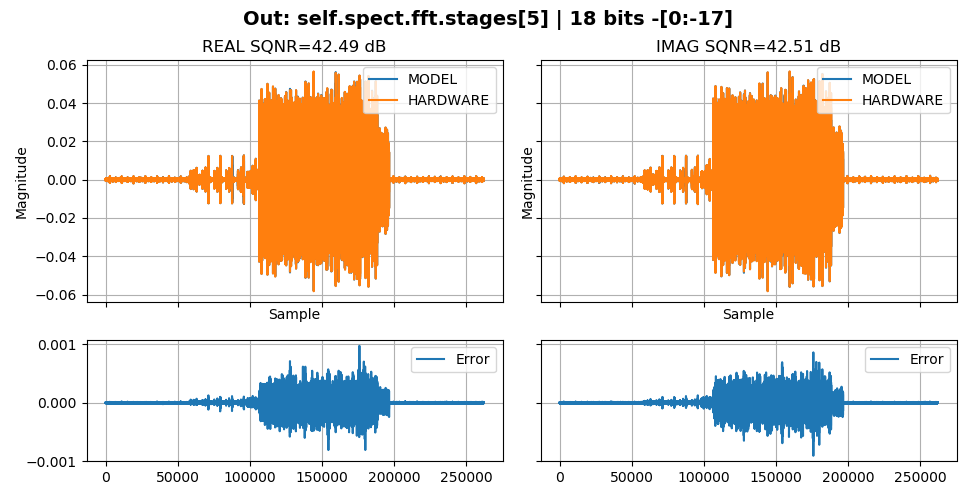

<IPython.core.display.Javascript object>


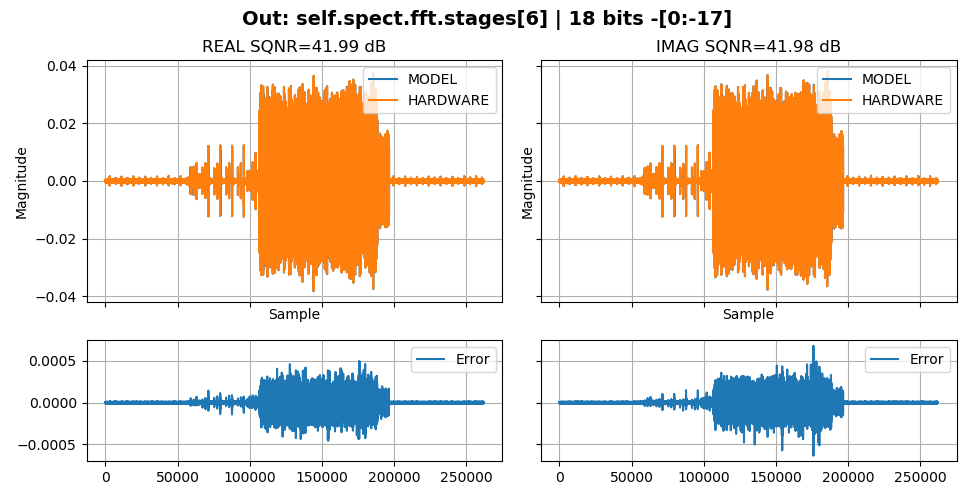

<IPython.core.display.Javascript object>


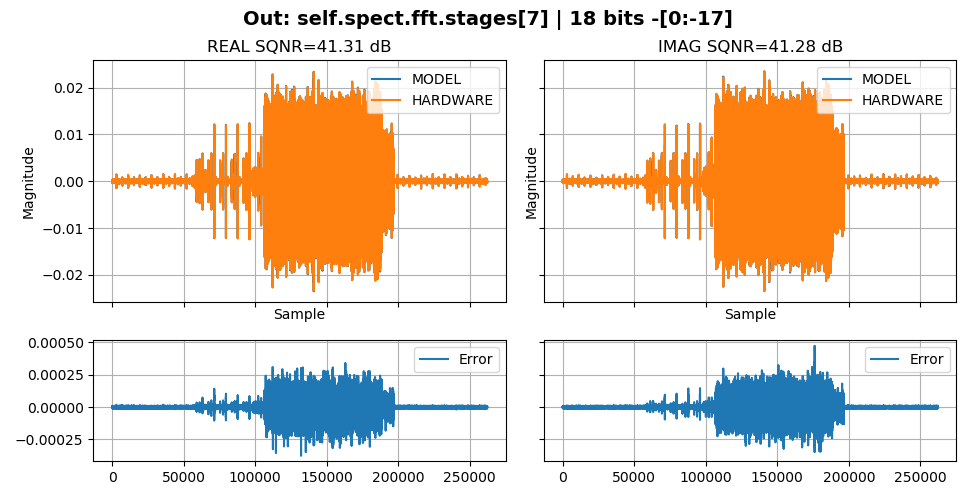

<IPython.core.display.Javascript object>


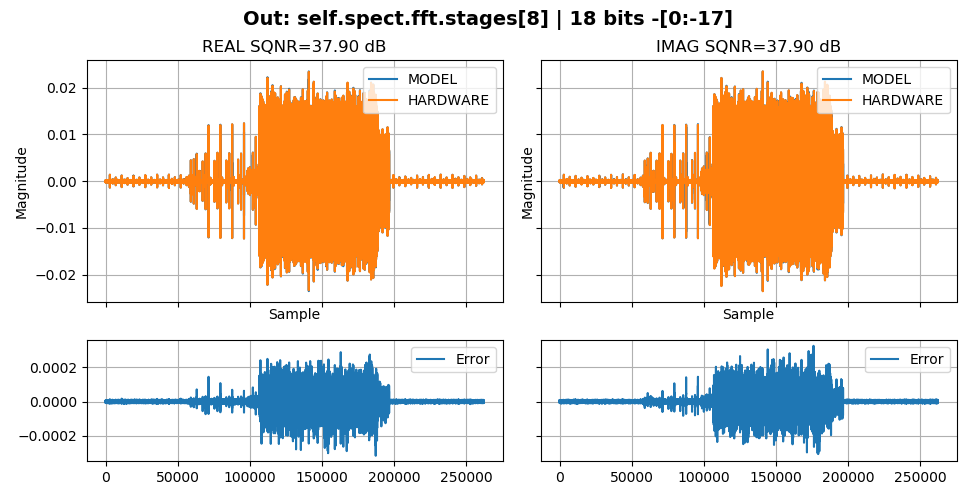

<IPython.core.display.Javascript object>


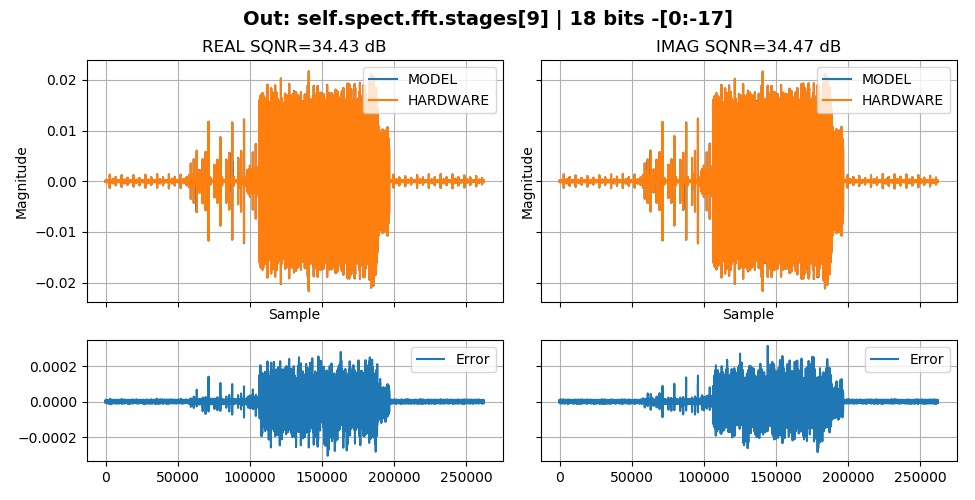

<IPython.core.display.Javascript object>


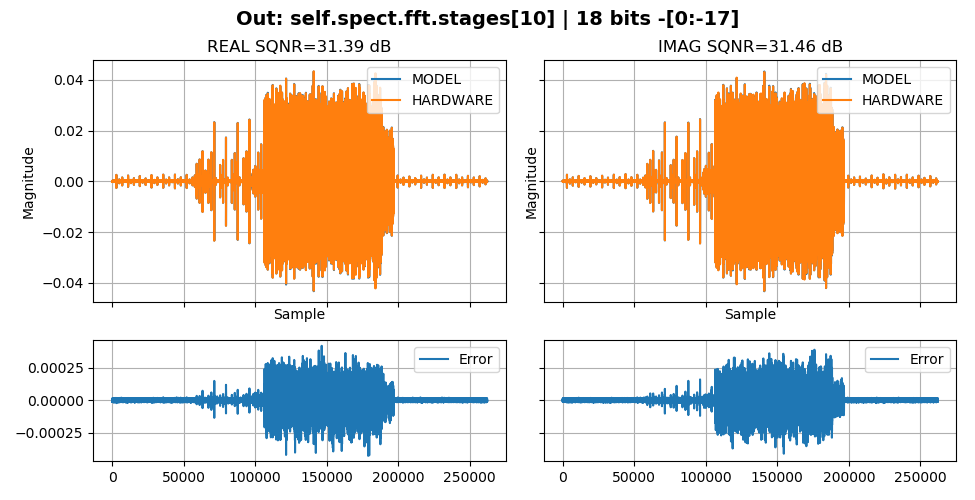

<IPython.core.display.Javascript object>


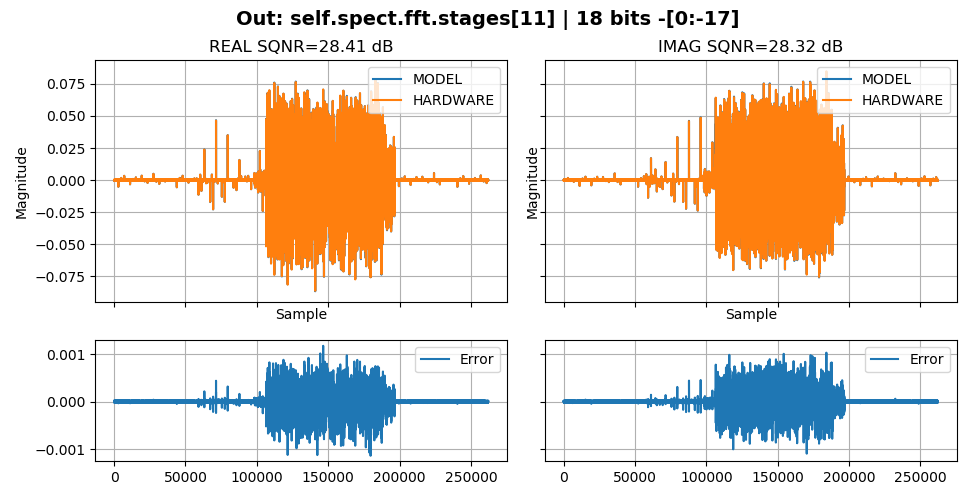

<IPython.core.display.Javascript object>


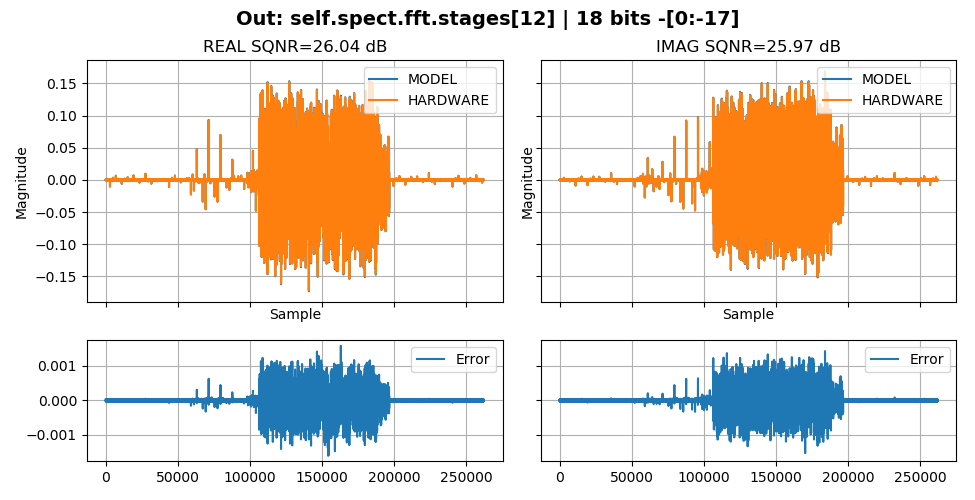

<IPython.core.display.Javascript object>


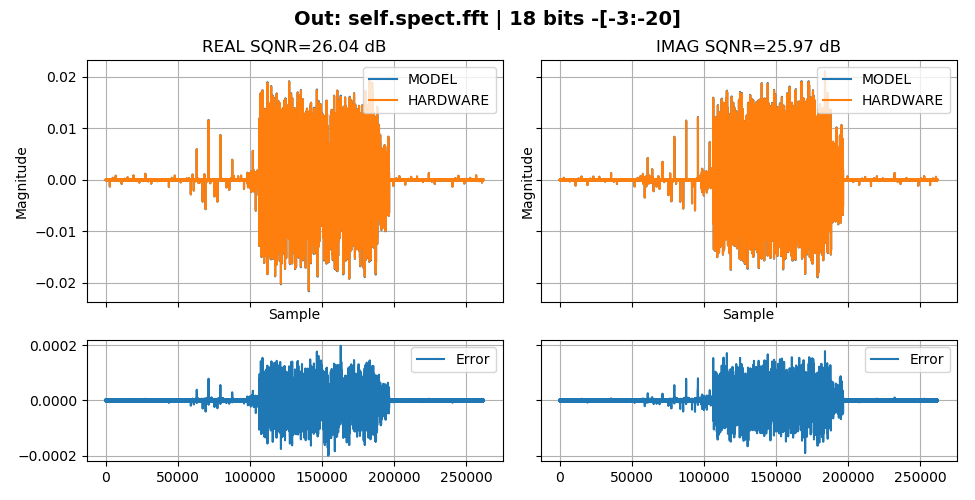

<IPython.core.display.Javascript object>


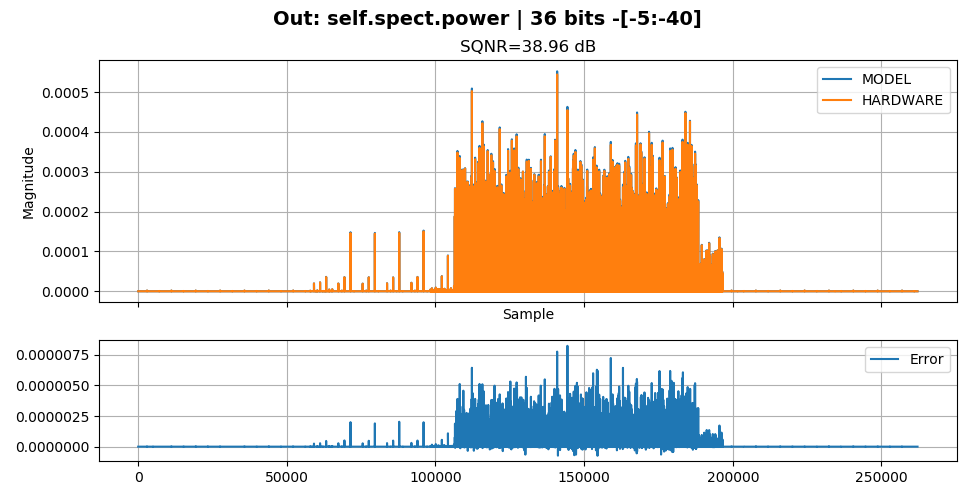

<IPython.core.display.Javascript object>


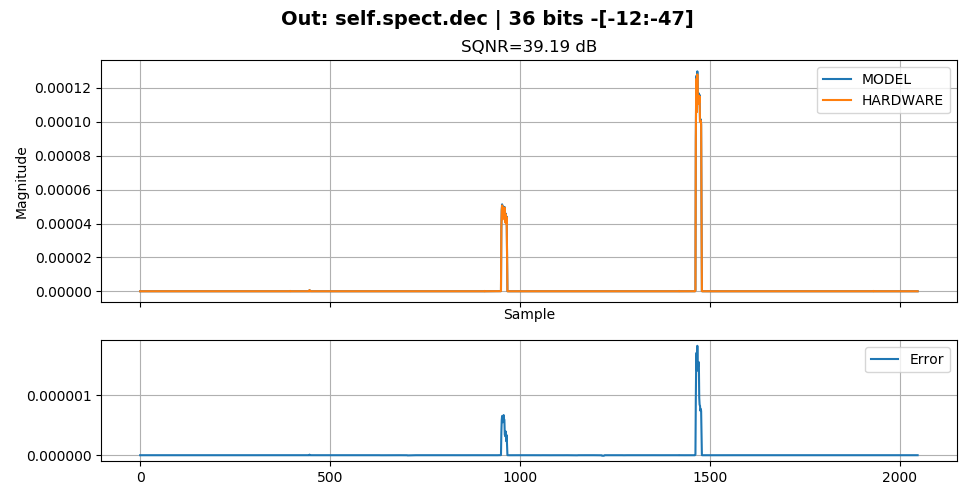

<IPython.core.display.Javascript object>


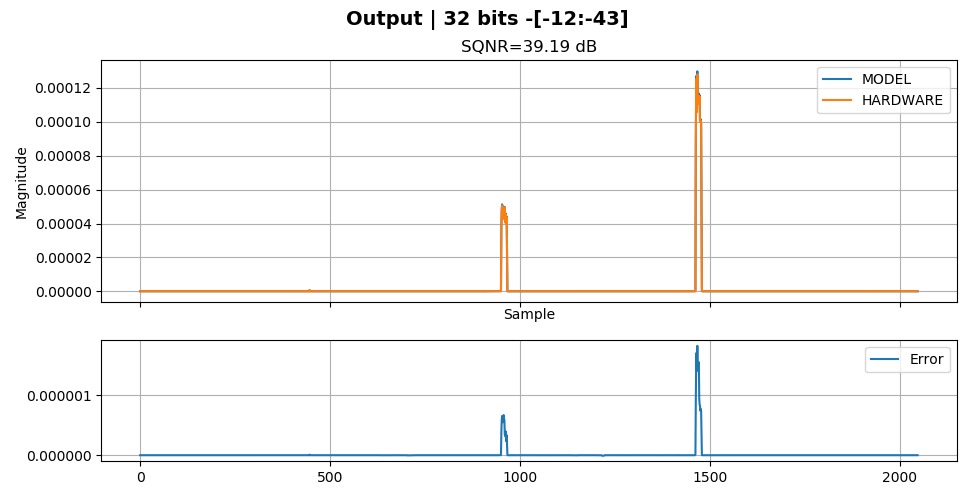

<IPython.core.display.Javascript object>


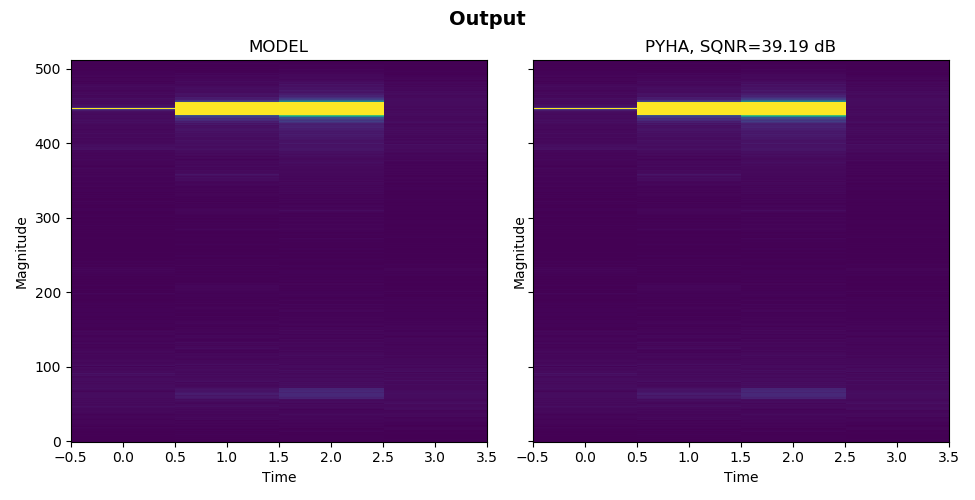

In [4]:
dut = SpectrogramLimeSDR()
crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3strong_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

## Low power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 262144/262144 [04:24<00:00, 992.55it/s] 

INFO:sim:Flushing the pipeline to collect 2048 valid samples (currently have 1536)


INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


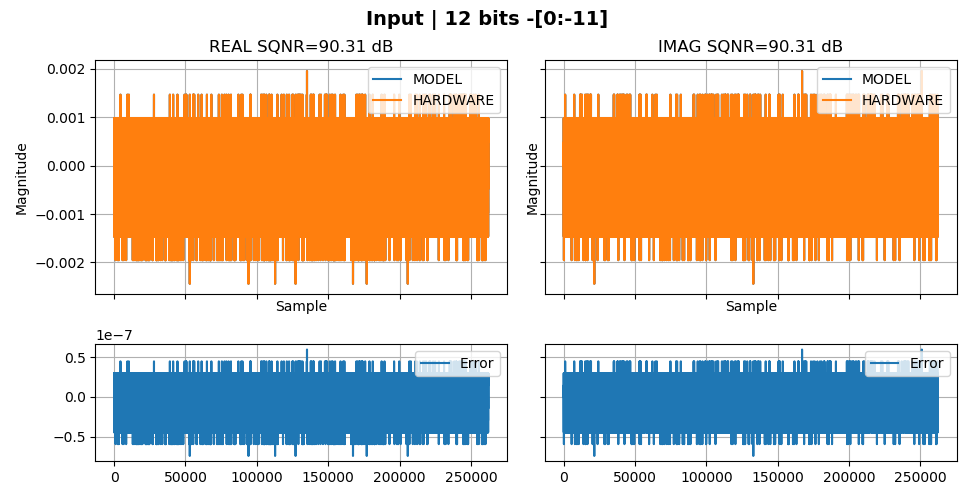

<IPython.core.display.Javascript object>


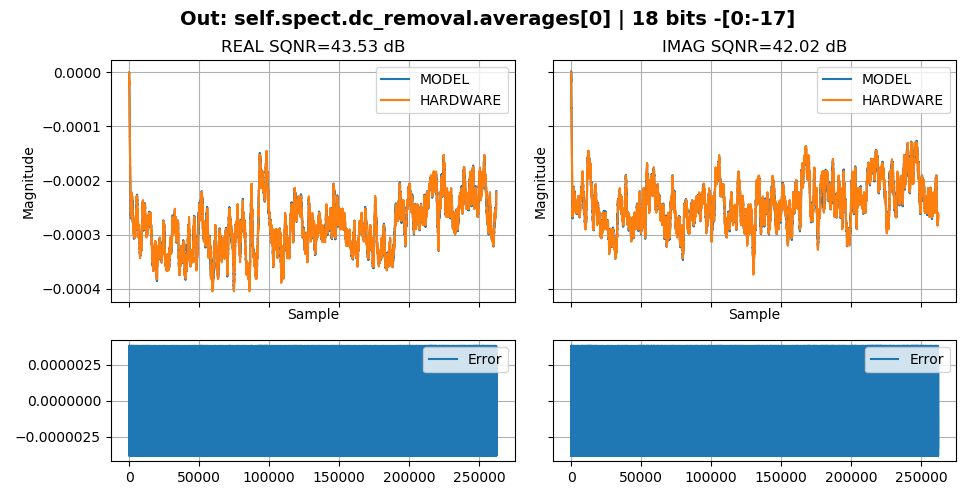

<IPython.core.display.Javascript object>


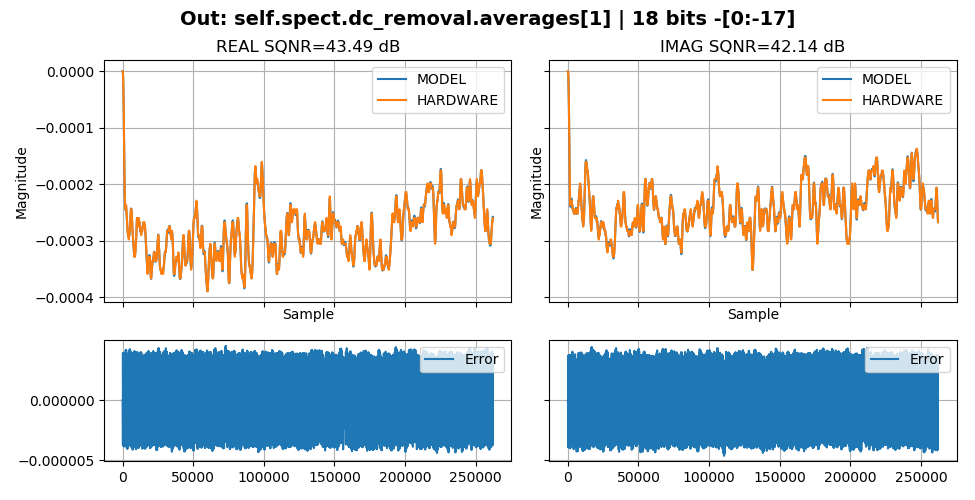

<IPython.core.display.Javascript object>


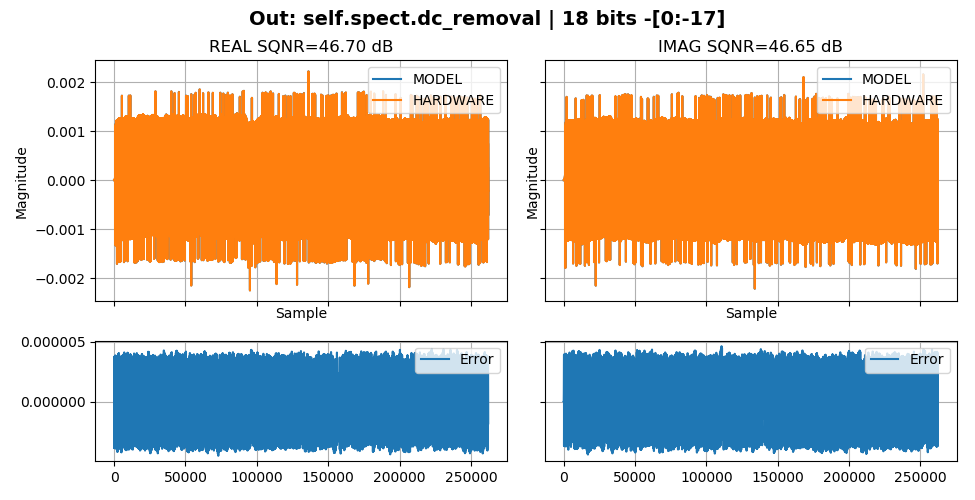

<IPython.core.display.Javascript object>


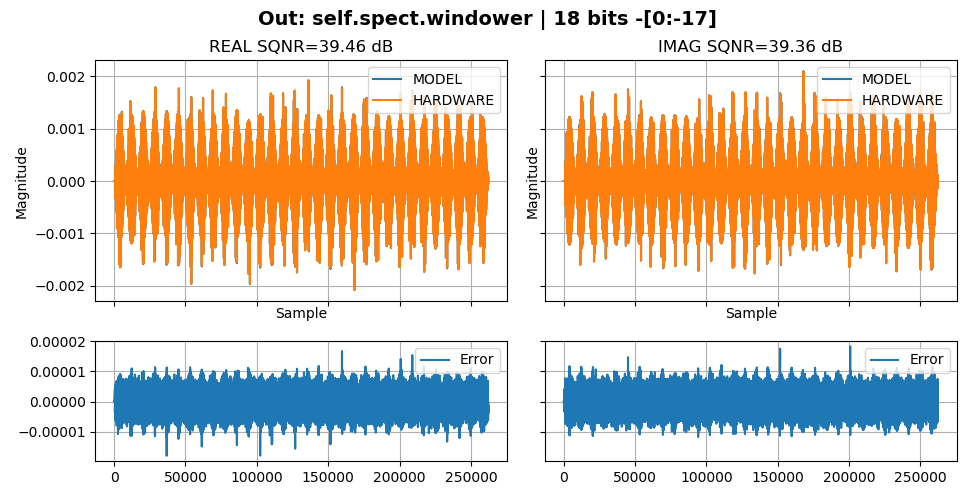

<IPython.core.display.Javascript object>


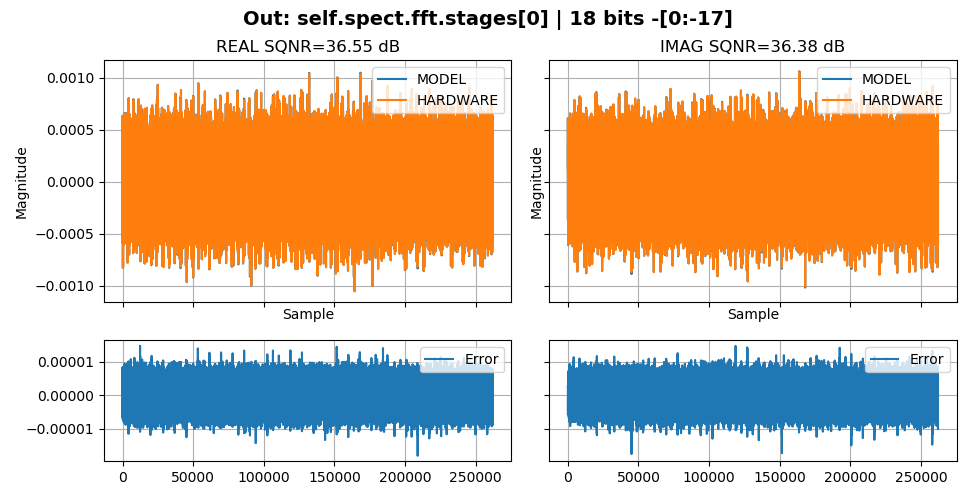

<IPython.core.display.Javascript object>


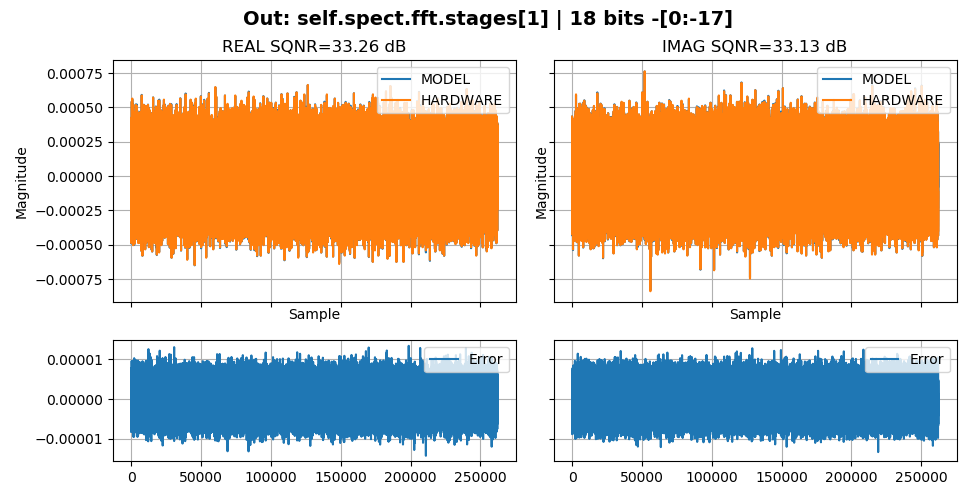

<IPython.core.display.Javascript object>


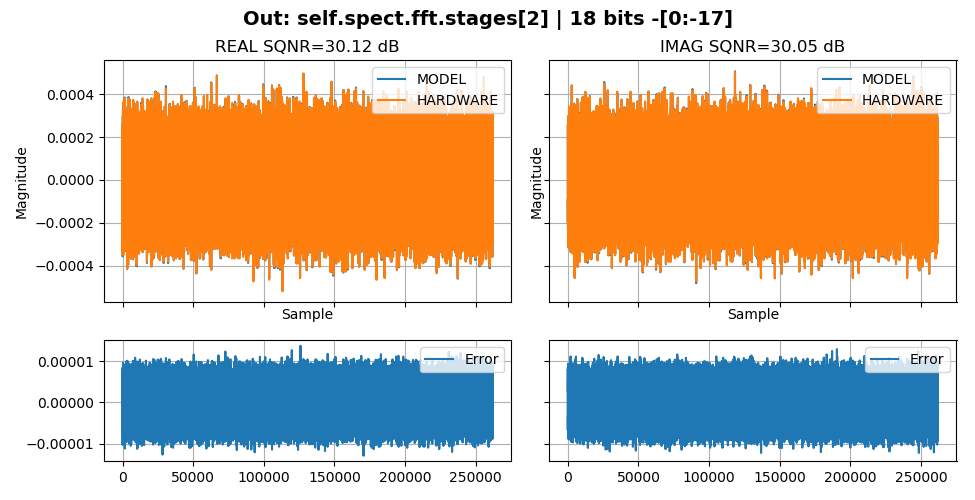

<IPython.core.display.Javascript object>


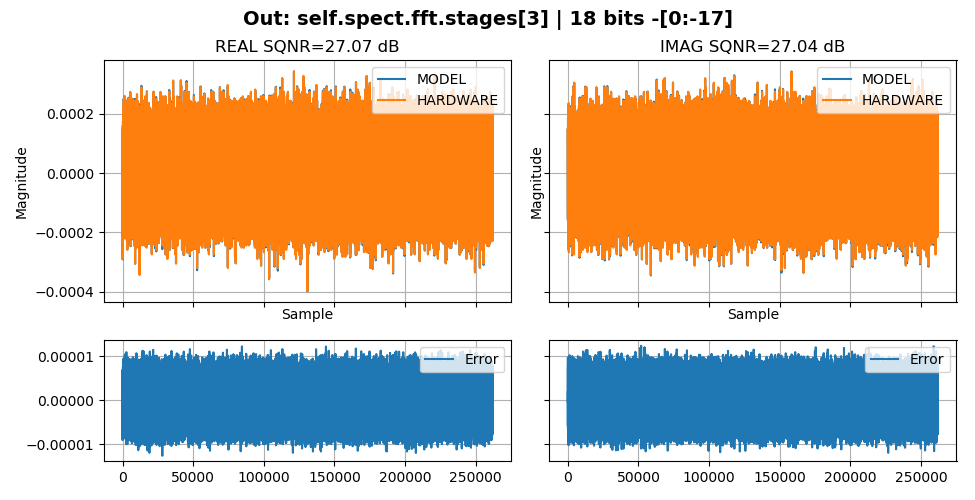

<IPython.core.display.Javascript object>


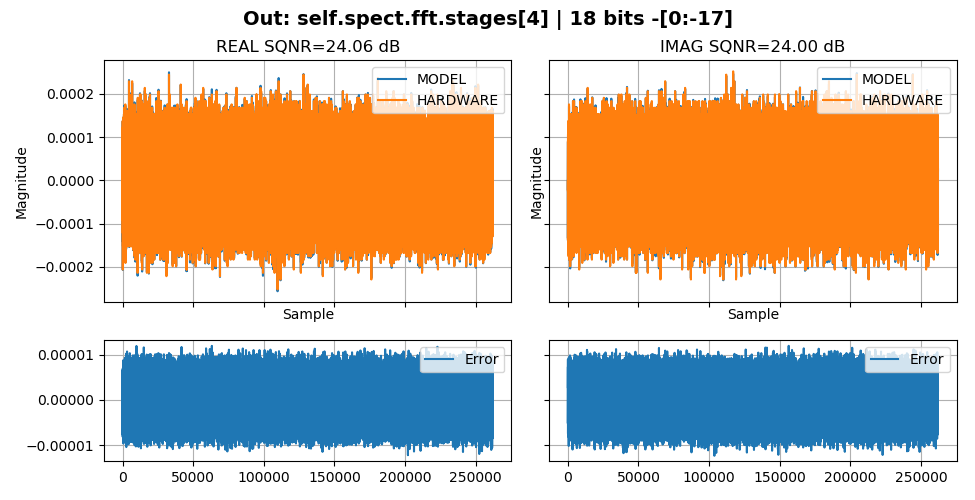

<IPython.core.display.Javascript object>


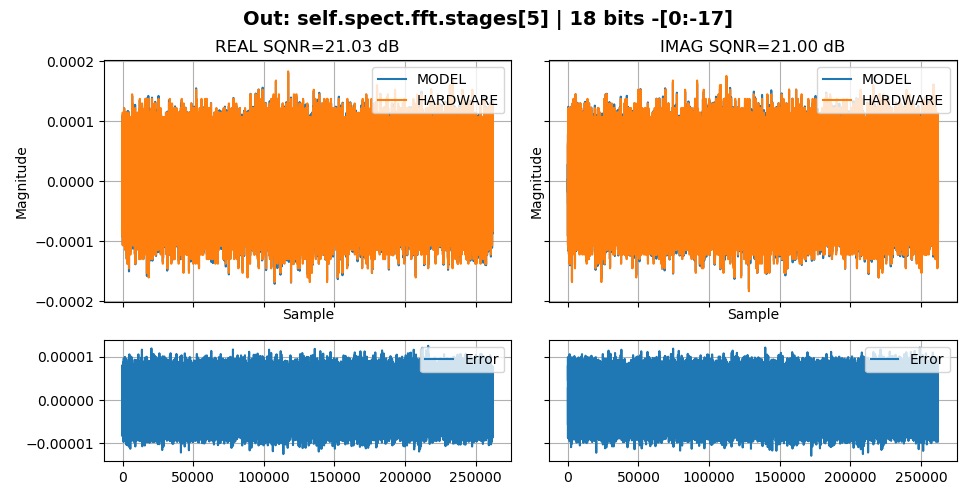

<IPython.core.display.Javascript object>


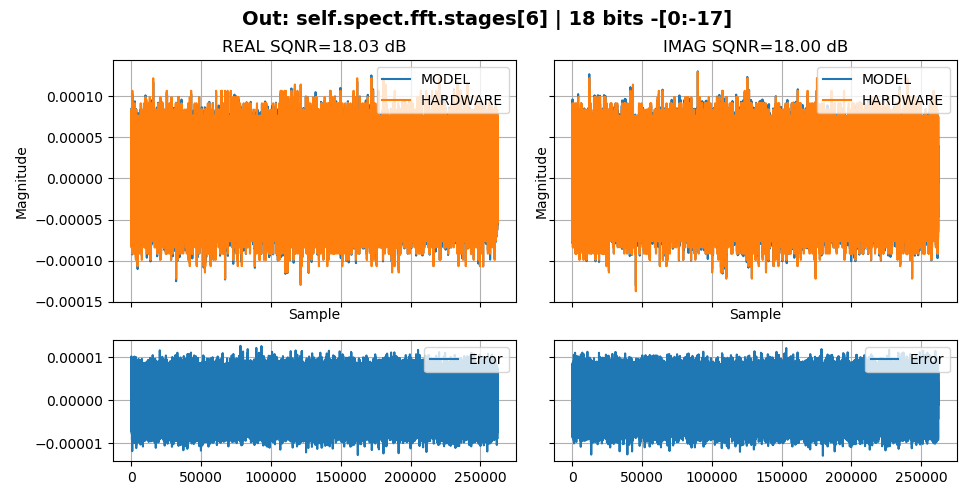

<IPython.core.display.Javascript object>


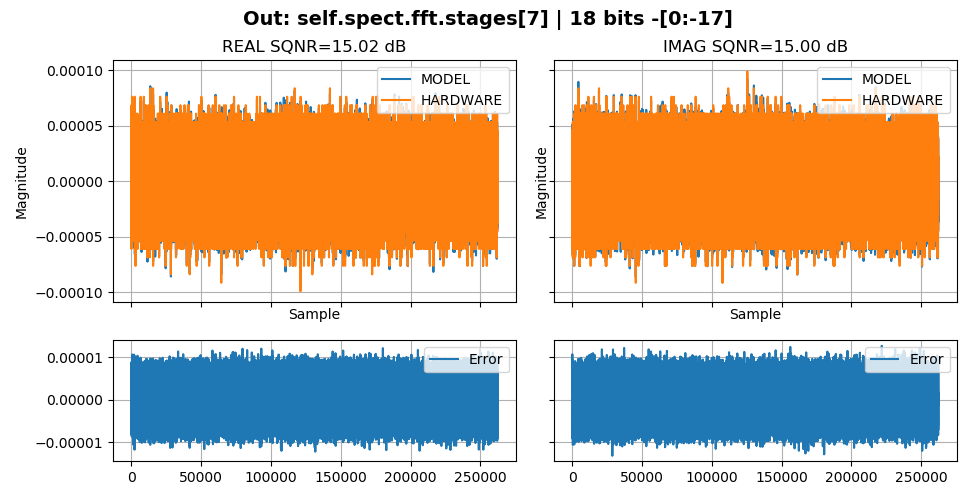

<IPython.core.display.Javascript object>


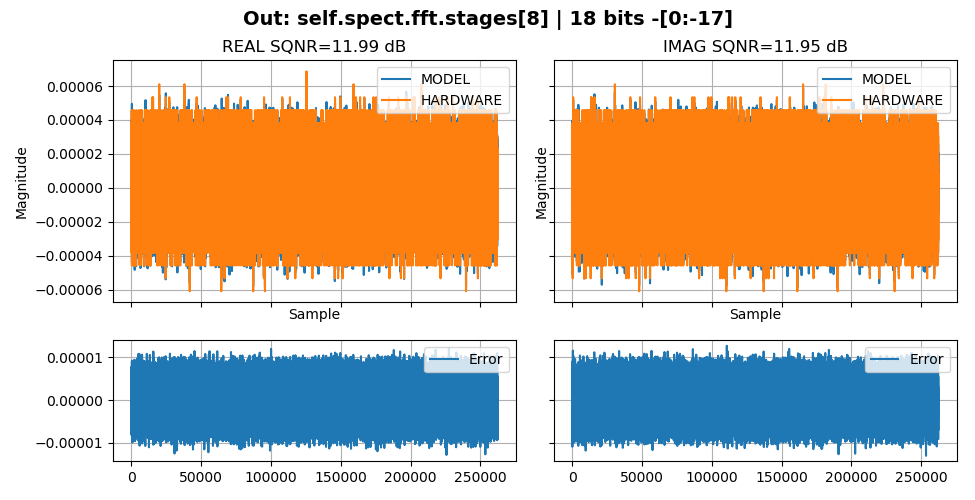

<IPython.core.display.Javascript object>


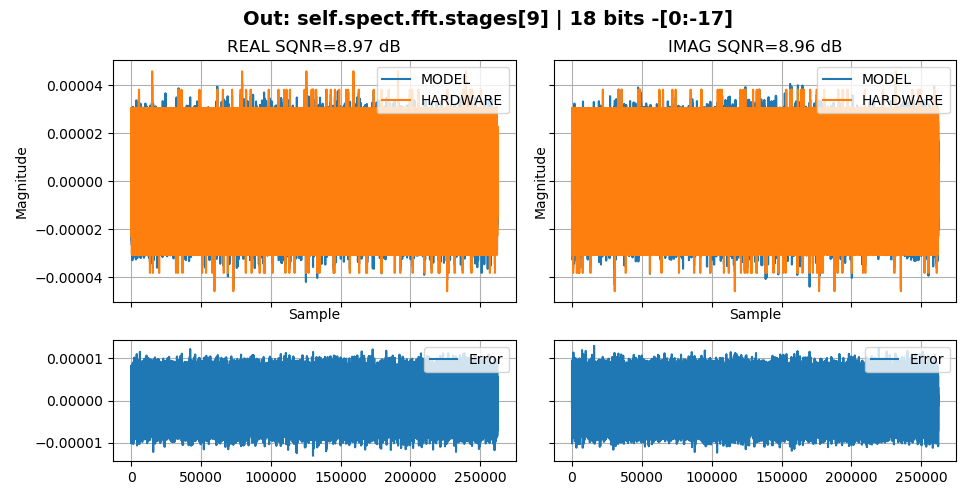

<IPython.core.display.Javascript object>


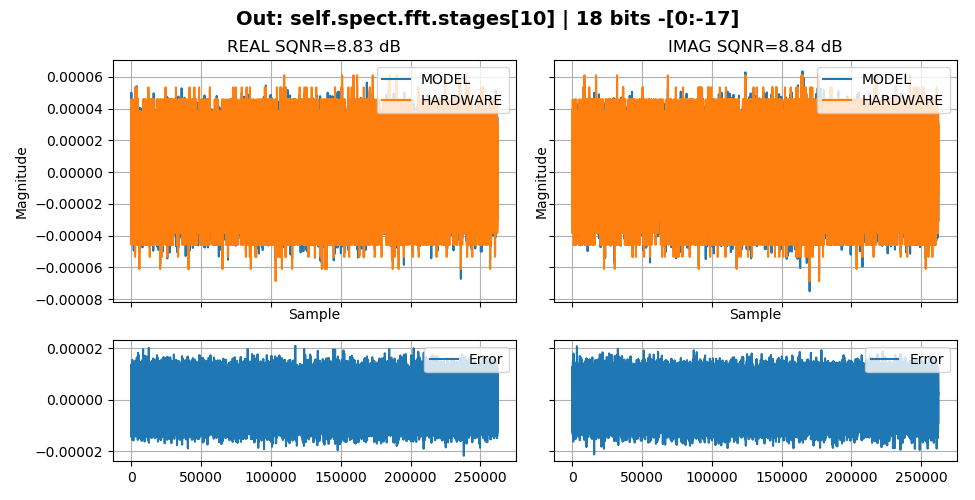

<IPython.core.display.Javascript object>


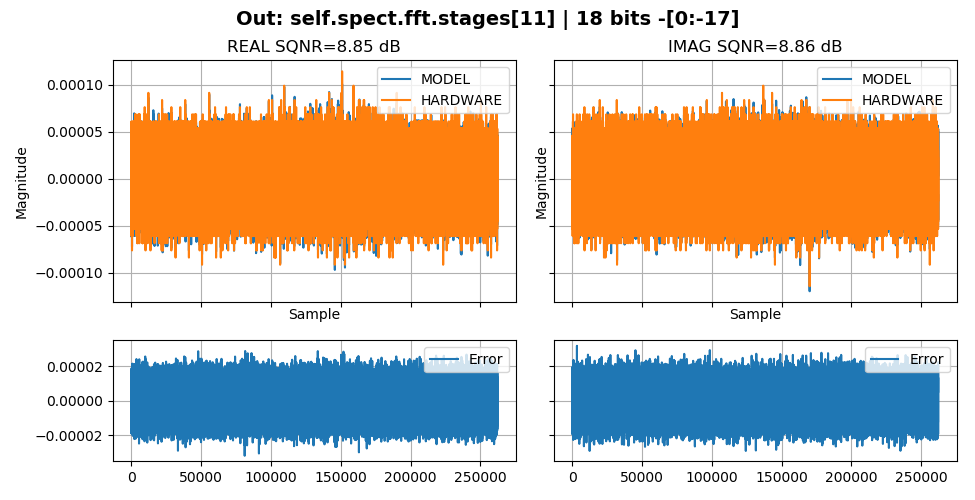

<IPython.core.display.Javascript object>


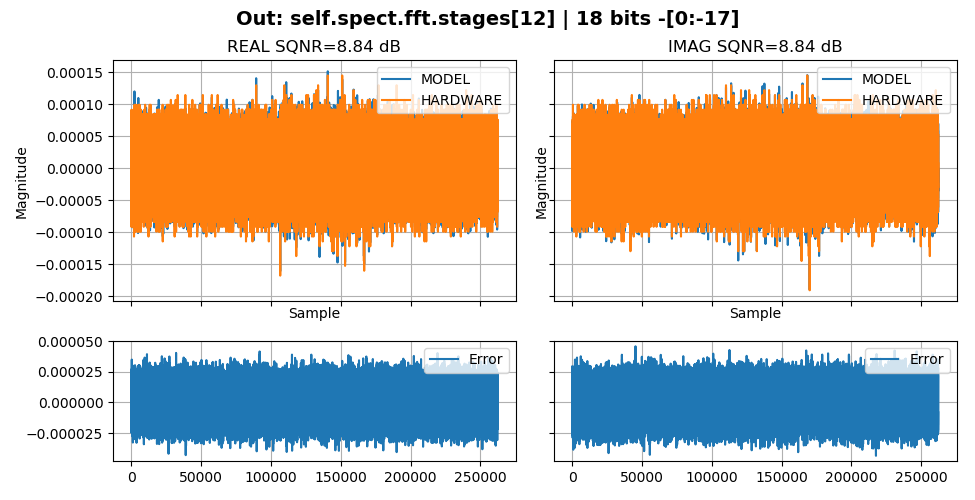

<IPython.core.display.Javascript object>


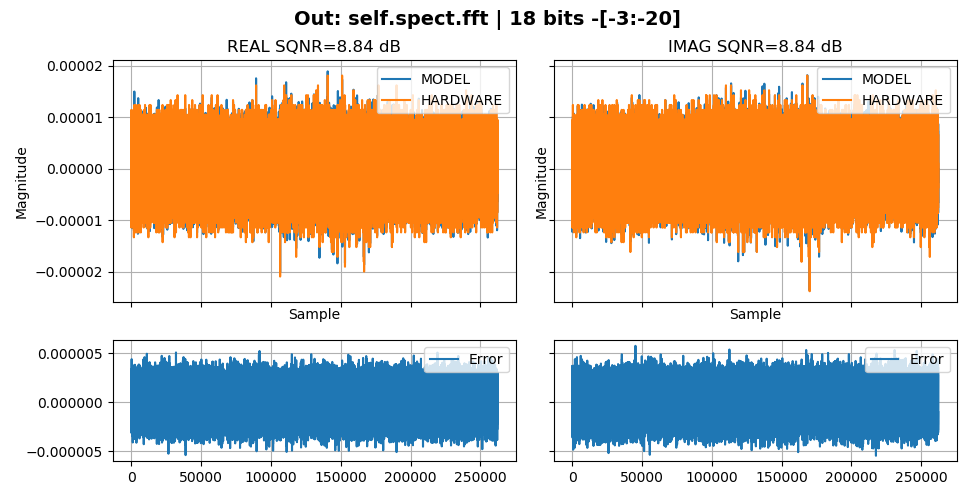

<IPython.core.display.Javascript object>


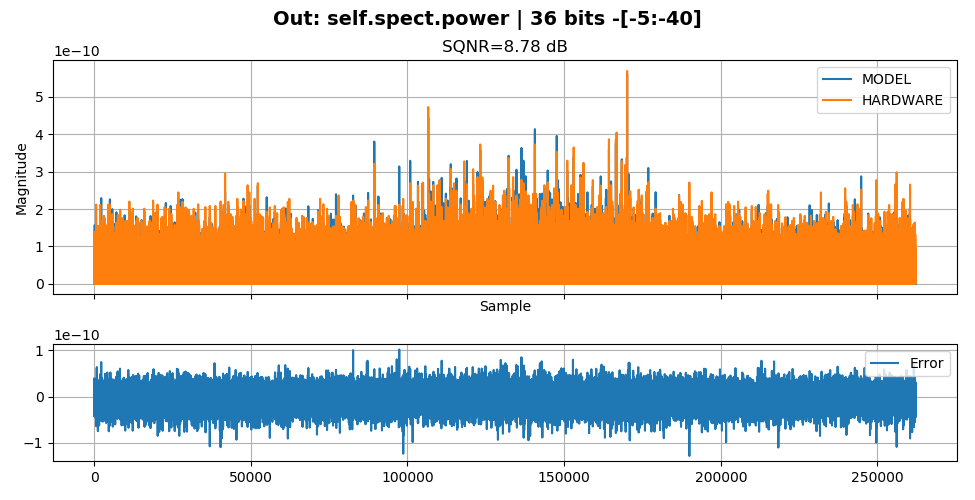

<IPython.core.display.Javascript object>


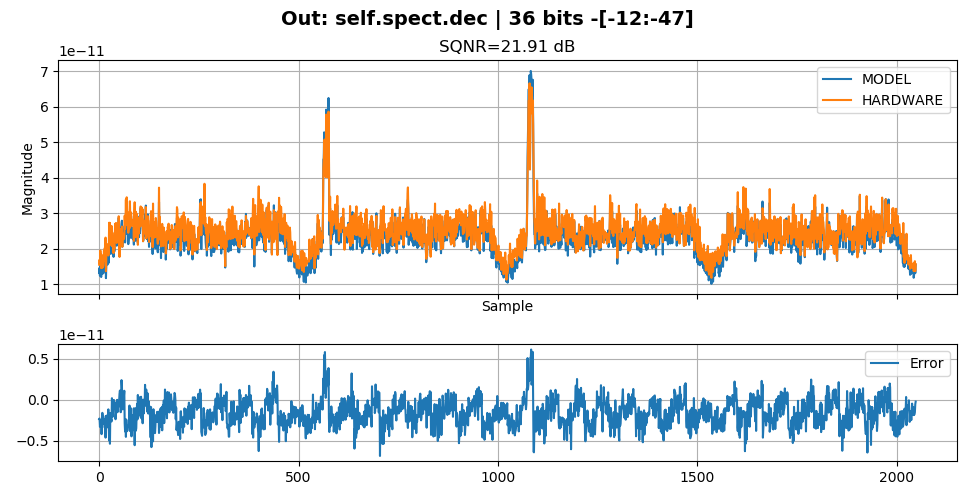

<IPython.core.display.Javascript object>


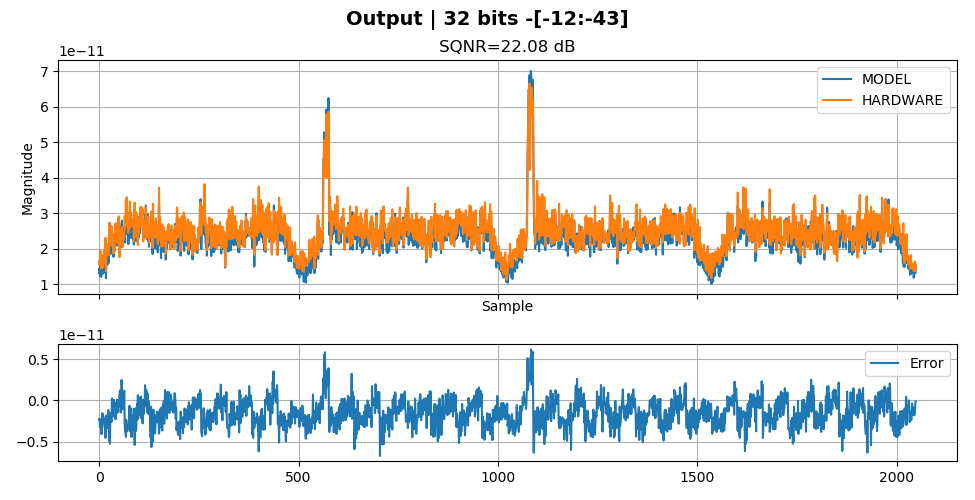

<IPython.core.display.Javascript object>


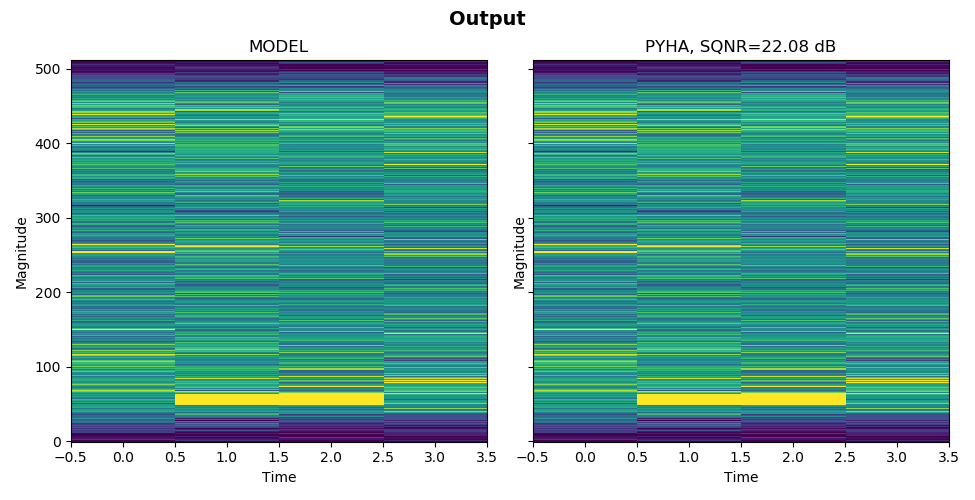

In [5]:
dut = SpectrogramLimeSDR()
crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3weak_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

# Conversion to VHDL and RTL/NETLIST simulations

In [ ]:
dut = SpectrogramLimeSDR()
minimal_input = input_signal[:dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS]
sims = simulate(dut, minimal_input, pipeline_flush='auto', 
                simulations=['MODEL', 'HARDWARE', 'RTL', 'NETLIST'], 
                conversion_path='/tmp/pyha_output')
assert hardware_sims_equal(sims)

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 65536/65536 [05:51<00:00, 186.60it/s]

INFO:sim:Flushing the pipeline to collect 512 valid samples (currently have 0)


INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DCRemoval to VHDL ...
INFO:conversion:Windower to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
I

# Synthesis:  resource usage and Fmax

In [ ]:
quartus = get_simulator_quartus() # reuse the work that was done during the simulation
print(quartus.get_resource_usage('fit'))
print(quartus.get_fmax())